<a href="https://colab.research.google.com/github/456258zaq/2024_1_Deeplearning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B0%9C%EB%A1%A0_%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C_%EC%9D%B4%EB%B3%91%ED%9B%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# auto arima 용 라이브러리설치
%pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00


In [35]:
import requests
import pandas as pd
import numpy as np

# Tiger 코스피 # 기준날짜 : 5월 2일
list_df = [] # 데이터프레임 저장용 리스트 생성
for i in range(1,100): #100페이지까지 조회
  url = f"https://finance.naver.com/item/sise_day.naver?code=277630&page={i}" # 조회용 url 생성
  page = requests.get(url,headers={"User-Agent":
  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"}) # request를 위한 header등 셋팅
  list_df.append(pd.read_html(page.text)[0]) # 데이터프레임 리스트에 밀어넣기

In [41]:
Tiger_Kospi_df = pd.concat(list_df) # 데이터 만들기
Tiger_Kospi_df.head() # 날짜 기준 ~ 24년 5월 2일까지의 데이터

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024.05.02,27735.0,하락 95,27700.0,27810.0,27625.0,1270.0
2,2024.04.30,27830.0,상승 115,27775.0,27970.0,27775.0,7649.0
3,2024.04.29,27715.0,상승 250,27650.0,27730.0,27540.0,2954.0
4,2024.04.26,27835.0,상승 270,27770.0,27890.0,27675.0,8969.0


In [42]:
Tiger_Kospi_df.dropna(inplace=True) # 인덱스 내 Null 값 제거 (보통 거래일이 없는 경우)
Tiger_Kospi_df.set_index("날짜",inplace=True) # 날짜를 index 로
Tiger_Kospi_df.drop(columns=["전일비"],inplace=True) # 전일비의 데이터는 삭제

(990, 5)


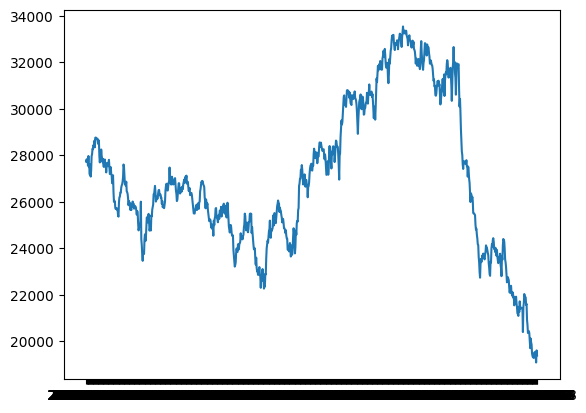

In [43]:
import matplotlib.pyplot as plt # 시각화용 라이브러리
print(Tiger_Kospi_df.shape)
plt.plot(Tiger_Kospi_df["종가"]) # 종가에 대한 예측을 진행할 예정

In [39]:
# 시계열 예측을 위한 모델은 통계적 모델 중 AR, MA, ARMA, ARIMA 등 다양하게 존재함
# 그 외의 딥러닝 계열에서는 RNN, LSTM, GRU, Transformer 등이 존재하며, CNN 활용한 모델 등 다양한 모델들이 있음
# 다만 차이점은 딥러닝의 경우, 장기시계열의 예측이 좋은 경우가 존재하며, ARIMA의 경우 장기예측에서 성능이 떨어지는 경우가 존재함
# 우선, 통계 대표 모델인 ARIMA 의 장기시계열을 예측하여 비교하고 (단변량)
# LSTM 을 기반으로한 장기시계열 예측 (다변량)
# Transformer를 기반으로 한 장기 시계열 예측 (다변량)으로 진행할 계획임

In [40]:
# ARIMA 모델은 과거에 p,q,d 라는 하이퍼파라미터는 직접 수정하면서 테스트 해야 했음
# 참조 : https://dong-guri.tistory.com/9
# p는 AR 모델의 하이퍼 파라미터
# d는 MA 모델의 하이퍼 파라미터
# q는 I 모델의 하이퍼 파라미터임

# AR은 얼마나 전의 데이터를 참고하여, 현재의 기준점을 반영할 것인지에 대한 파라미터
# MA는 이동 평균 (window 방식으로 평균을 내는 방법임)
# I는 차분을 통하여, 데이터의 정상성을 만들고 이를 기반으로 통계모델에 사용할 수 있도록 적합하는 방법임



In [44]:
train_df = Tiger_Kospi_df.iloc[:int(len(Tiger_Kospi_df)*0.8)] # train Set
test_df = Tiger_Kospi_df.iloc[int(len(Tiger_Kospi_df)*0.8):] # test Set

In [50]:
train_df

,종가,시가,고가,저가,거래량
날짜,,,,,
2024.05.02,27735.0,27700.0,27810.0,27625.0,1270.0
2024.04.30,27830.0,27775.0,27970.0,27775.0,7649.0
2024.04.29,27715.0,27650.0,27730.0,27540.0,2954.0
2024.04.26,27835.0,27770.0,27890.0,27675.0,8969.0
2024.04.25,27565.0,27750.0,27805.0,27565.0,14712.0
...,...,...,...,...,...
2021.02.23,31205.0,31105.0,31500.0,30965.0,8865.0
2021.02.22,31430.0,31940.0,31940.0,31300.0,7366.0
2021.02.19,31575.0,31495.0,31600.0,30960.0,5852.0


In [51]:
test_df

,종가,시가,고가,저가,거래량
날짜,,,,,
2021.02.16,32100.0,32150.0,32300.0,32015.0,1695.0
2021.02.15,32000.0,31985.0,32080.0,31895.0,3121.0
2021.02.10,31620.0,31535.0,31620.0,31260.0,4470.0
2021.02.09,31350.0,31685.0,31760.0,31350.0,2721.0
2021.02.08,31500.0,31500.0,31785.0,31500.0,1901.0
...,...,...,...,...,...
2020.05.07,19410.0,19325.0,19465.0,19310.0,20126.0
2020.05.06,19325.0,19280.0,19400.0,19170.0,115387.0
2020.05.04,19090.0,19145.0,19305.0,19055.0,242572.0


In [45]:
# auto arima 모델 사용
# 출처 : https://assaeunji.github.io/statistics/2021-09-08-arimapdq/
# 출처 : https://dong-guri.tistory.com/9

In [100]:
import pmdarima as pm
auto_arima_model = pm.auto_arima(train_df["종가"].values,seasonal=True)

In [101]:
auto_arima_model.predict(4)

array([31935., 31935., 31935., 31935.])

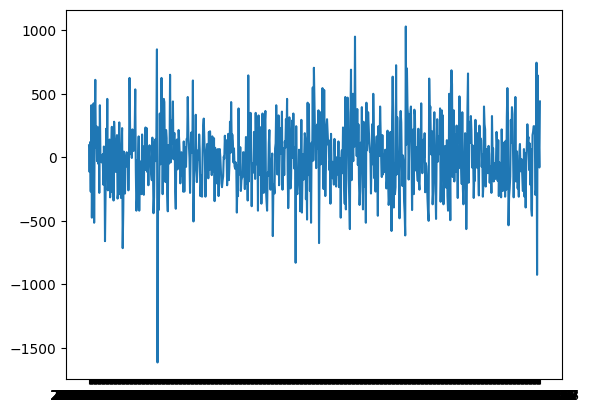

In [102]:
diff_1 = train_df["종가"].diff().dropna()
plt.plot(diff_1)

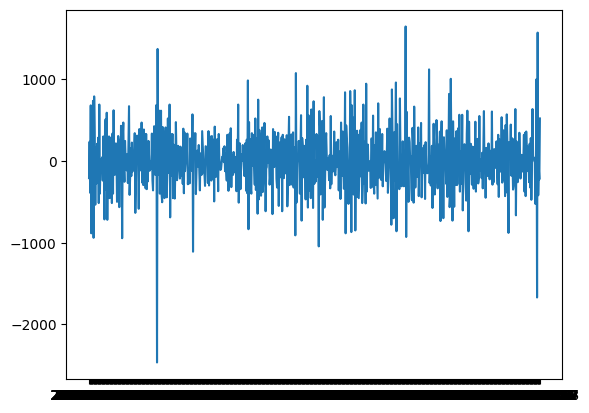

In [103]:
diff_2 = diff_1.diff().dropna()
plt.plot(diff_2)

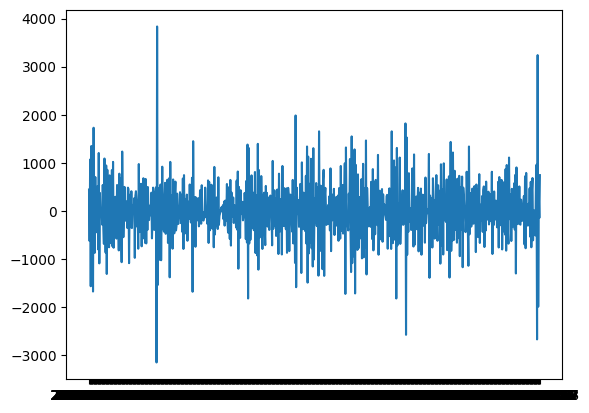

In [104]:
diff_3 = diff_2.diff().dropna()
plt.plot(diff_3)

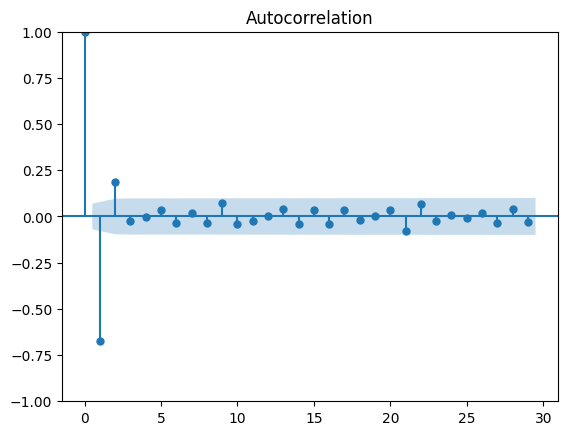

In [109]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(diff_3)
plt.show()

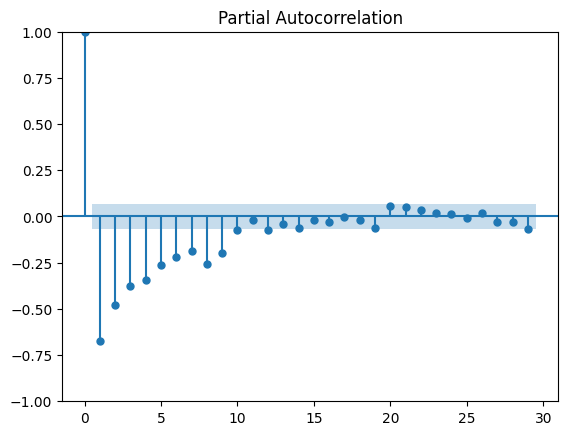

In [110]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_pacf(diff_3)
plt.show()

In [111]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train_df["종가"].values,order=(3,3,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  792
Model:                 ARIMA(3, 3, 0)   Log Likelihood               -5866.745
Date:                Thu, 02 May 2024   AIC                          11741.490
Time:                        12:48:36   BIC                          11760.173
Sample:                             0   HQIC                         11748.672
                                - 792                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1183      0.021    -52.831      0.000      -1.160      -1.077
ar.L2         -0.8053      0.026    -31.511      0.000      -0.855      -0.755
ar.L3         -0.3423      0.018    -19.053      0.0

In [112]:
test_df["predict"] = model_arima_fit.predict(start=4,end=201)

<ipython-input-112-4c567afdad2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["predict"] = model_arima_fit.predict(start=4,end=201)


[]

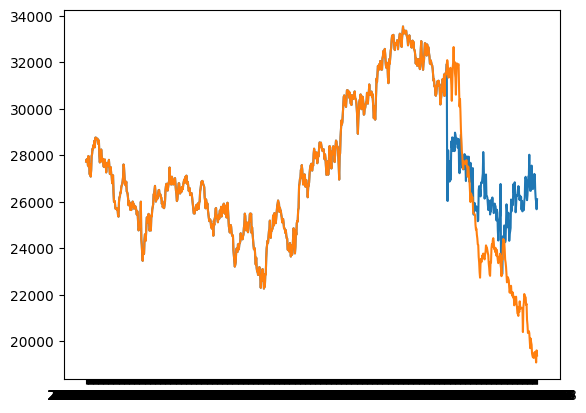

In [113]:
plt.plot(pd.concat([train_df["종가"],test_df["predict"]]))
plt.plot(Tiger_Kospi_df["종가"]) # 종가에 대한 예측을 진행할 예정
plt.plot()